# **DIPLOMATURA 2022**

# ANALISIS Y VISUALIZACION DE DATOS
   

### Ejercicio 1 - Análisis descriptivo
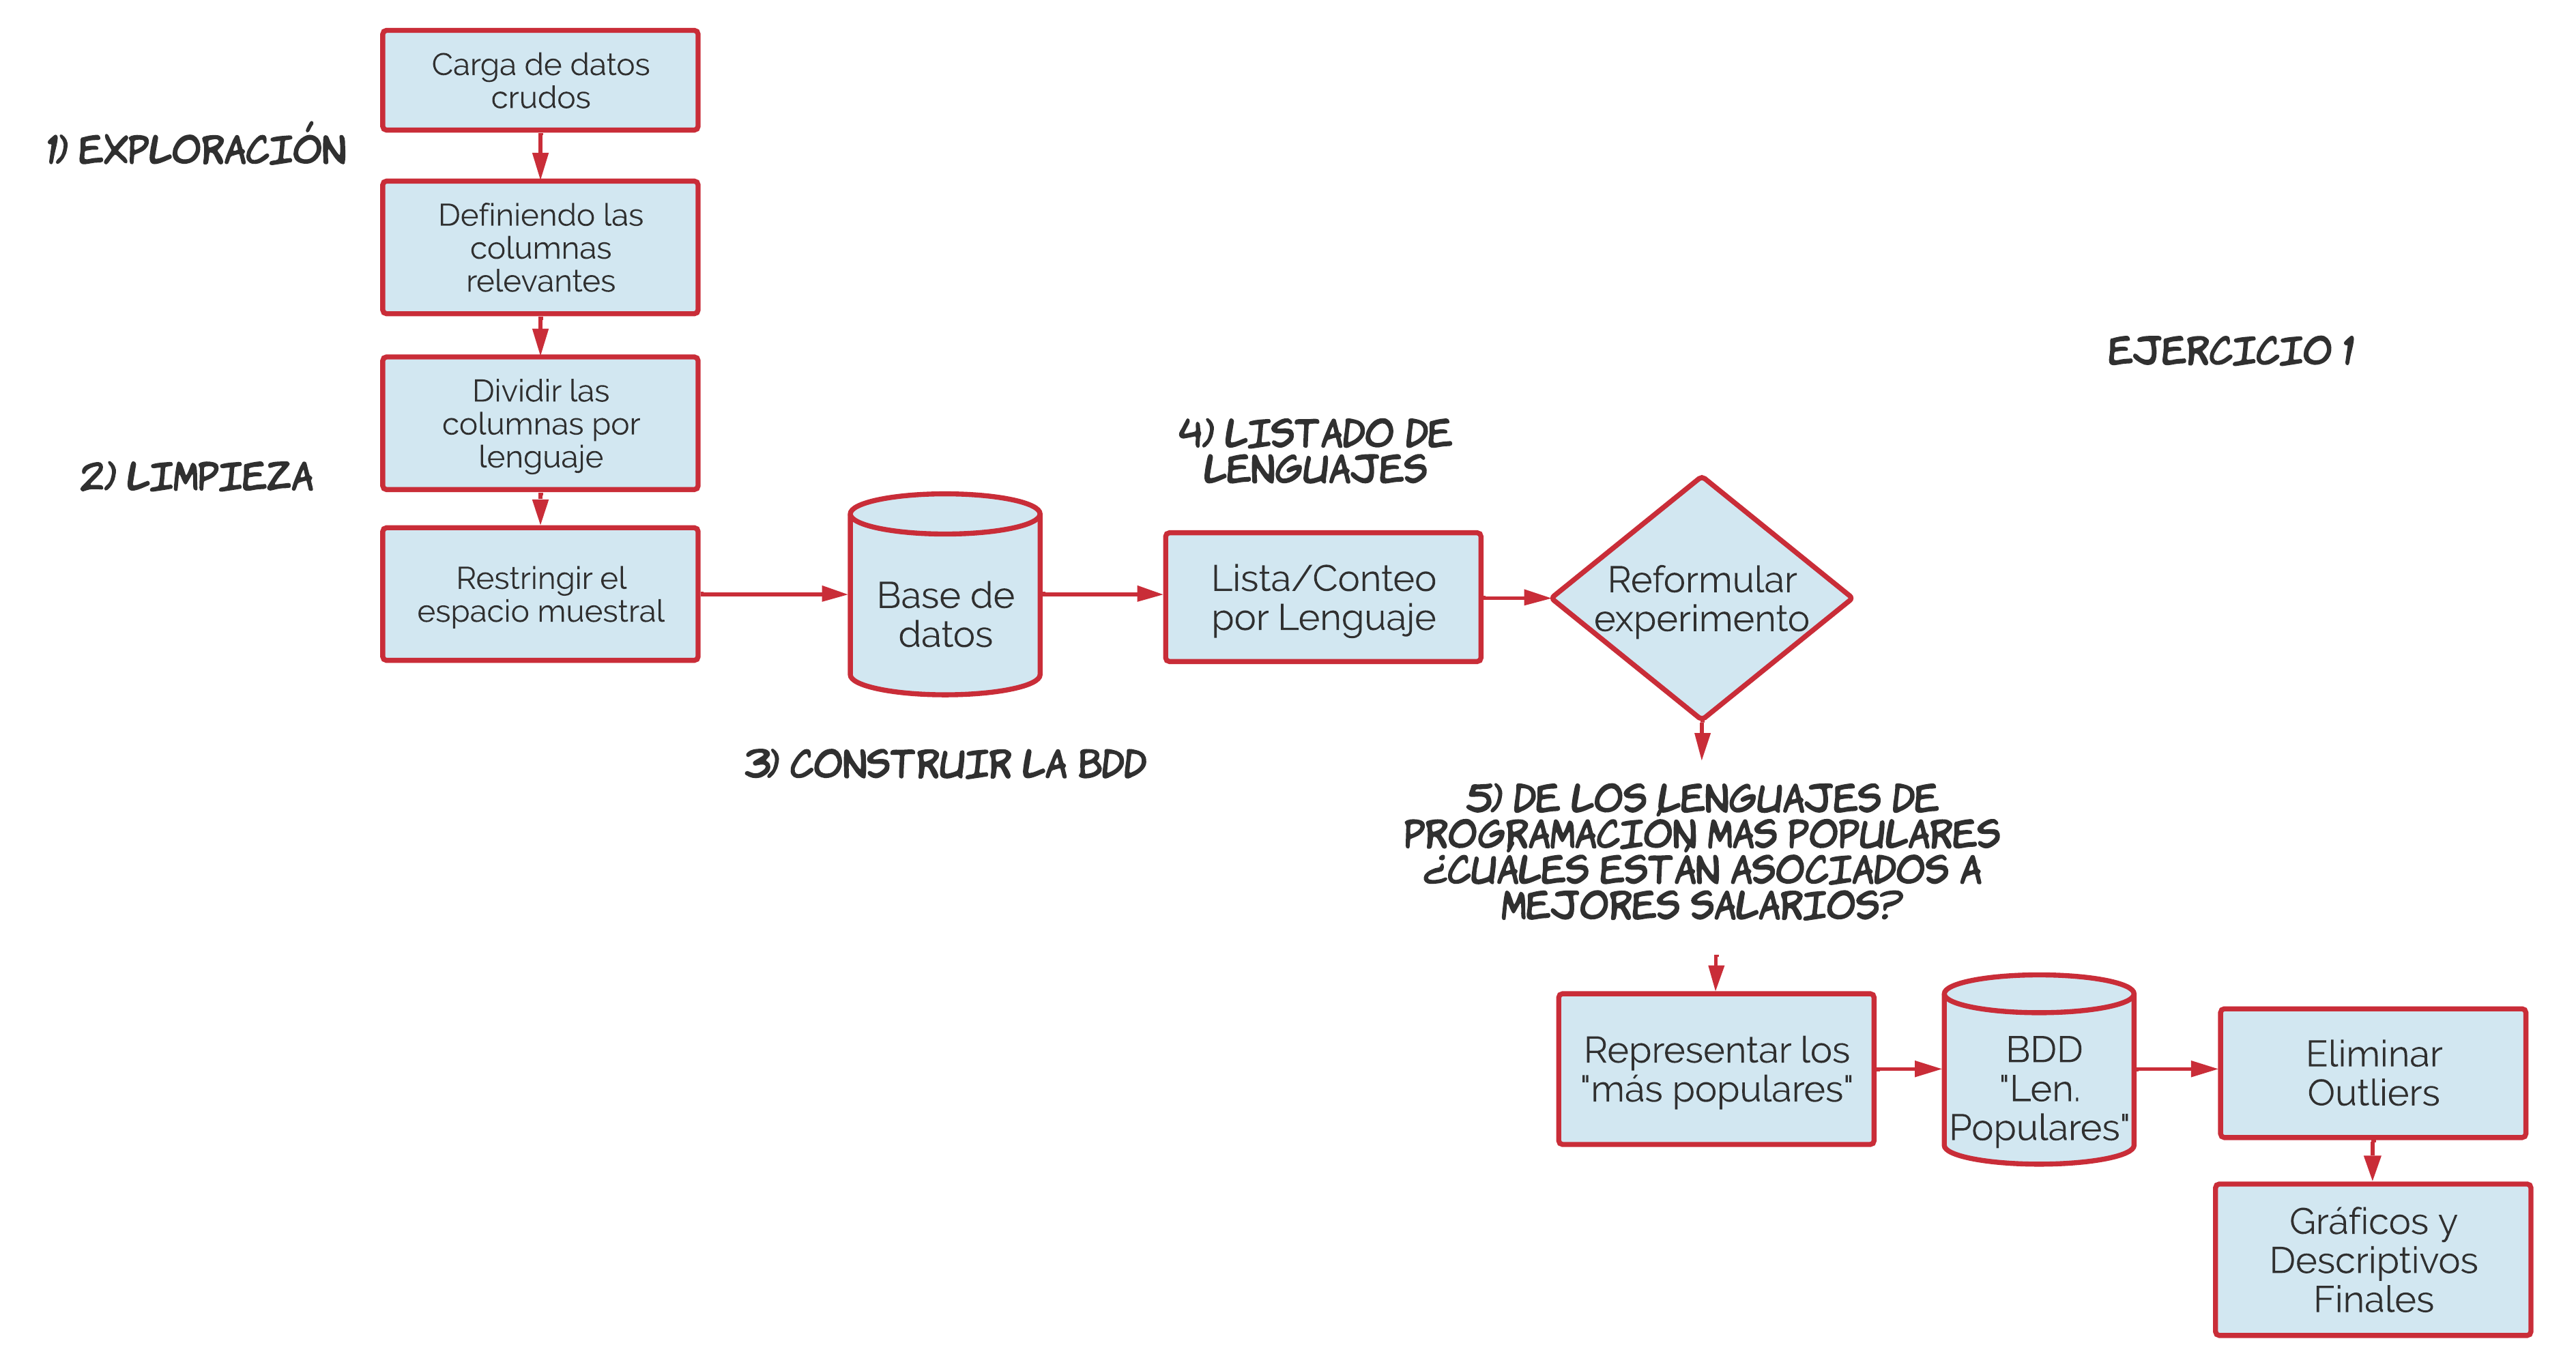

## Desarrollo:

### 1 - Análisis descriptivo:

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para resolver la anterior se plantea la siguiente premisa: 
  * _"Teniendo conocimiento de ciertos lenguajes de programación, los trabajadores de este rubro podrán cobrar mejores salarios"._

Para ello **identificamos las variables a analizar:**
  * salary_monthly_BRUTO
  * tools_programming_languages 
  * salary_monthly_NETO

### Futuros análisis:
  * profile_has_disabilities 
  * work_contract_type
  * profile_gender 
  * profile_years_experience
  * work_years_in_company
  * profile_studies_level


#### 2. Exploración de los datos

##### _Lectura y acondicionamiento del dataset_

Se procurará la extracción del conjunto de datos, aquellos registros que presenten: incosistencias, sean nulos, contengan vacios y/o sean incorrectos, para realizar un correcto análisis. Las etapas son:

### 2.a) Incorporando bibliotecas estándar

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

seaborn.set_context('talk')

### 2. b) Lectura inicial del conjunto de datos

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df_raw_data = pd.read_csv(url)


### 2. c) Consulta de generalidades en el Conjunto de datos

In [3]:
print(f"Tipo de variables presentes en el conjunto de datos crudo (raw):\n {df_raw_data.dtypes}")


Tipo de variables presentes en el conjunto de datos crudo (raw):
 profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                        

### 2. d) Relevamiento del tipo de las columnas de interés...

In [4]:
# Vamos a trabajar con Lenguajes de programacion y Salarios, 
# tenemos que ver como estan estas conformados estas columnas 
# en cuanto a su tipo.
print('---------- ---------- ---------- ----------\n')
print(f"El campo tools_programming_languages es tipo:\n{df_raw_data.tools_programming_languages.dtype}")
print(f"El campo salary_monthly_BRUTO es tipo:\n{df_raw_data.salary_monthly_BRUTO.dtype}")
print(f"El campo salary_monthly_NETO es tipo:\n{df_raw_data.salary_monthly_NETO.dtype}")

print('---------- ---------- ---------- ----------\n')
print(f"Observando las características de la variable tools_programming_languages:\n{df_raw_data.tools_programming_languages}")
print('---------- ---------- ---------- ----------\n')

---------- ---------- ---------- ----------

El campo tools_programming_languages es tipo:
object
El campo salary_monthly_BRUTO es tipo:
float64
El campo salary_monthly_NETO es tipo:
float64
---------- ---------- ---------- ----------

Observando las características de la variable tools_programming_languages:
0                                                 Ninguno
1                                HTML, Javascript, Python
2                                                 Ninguno
3       Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                  CSS, HTML, Javascript, SQL, TypeScript
                              ...                        
6090    .NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...
6091                            Ninguno de los anteriores
6092                            Ninguno de los anteriores
6093     C, C++, HTML, Java, Javascript, PHP, Python, SQL
6094                            Ninguno de los anteriores
Name: tools_programming_languages, Length: 6095, dt

### 2. e) Creando el campo o columna: "cured_programming_languages"

##### * Columnas relevantes:

In [5]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO','work_contract_type',
                    'profile_gender', 'profile_has_disabilities' ,'profile_years_experience', 'work_years_in_company', 'profile_studies_level']



In [6]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_raw_data.loc[:, 'cured_programming_languages'] = df_raw_data.tools_programming_languages\
    .apply(split_languages)

if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

print('---------- ---------- ---------- ----------\n')
print(f"Observando las características de la variable cured_programming_languages:\n{df_raw_data.cured_programming_languages}")
print('---------- ---------- ---------- ----------\n')



---------- ---------- ---------- ----------

Observando las características de la variable cured_programming_languages:
0                                               [ninguno]
1                              [html, javascript, python]
2                                               [ninguno]
3       [bash/shell, c, css, html, java, javascript, p...
4                [css, html, javascript, sql, typescript]
                              ...                        
6090    [.net, c#, cobol, css, html, javascript, php, ...
6091                                                   []
6092                                                   []
6093    [c, c++, html, java, javascript, php, python, ...
6094                                                   []
Name: cured_programming_languages, Length: 6095, dtype: object
---------- ---------- ---------- ----------



### 2. f) Selección de las variables de interés:

In [7]:
# Realizamos un Subset del conjunto inicial,
# Dejamos solamente las columnas de interés:
df_relevant = df_raw_data[relevant_columns]

### 2. g) Restricción del espacio muestral:

Se propone crear una serie de filtros a fin de descartar registros que no son de interes asi como las inconsistencias. Por ejemplo:
  *  Extraer aquellos registros en los que el encuestado marco que no programaba ningún o aparece vacio en lenguaje: ```(tools_programming_languages <> ninguno)```, pues serian inconsistentes dado el objetivo del análisis. ->(Condición 0, 1 y 2).
  *  Excluir aquellos salarios que sean iguales o inferiores a un determinado monto dado que los mismos no podrian ser considerados como _"Mejores"_, en nuestro caso este se fijo en: $15000 Ars. ->(Condición 3).
  *  Excluimos donde la proporción de descuento entre el Bruto y el Neto es inconsistente. ->(Condición 4).

Nota: se incluyen en la celda el conteo de cuantos registros no se tendrán en cuenta según sea el filtro.

#### Aplicando los filtros anteriores


In [8]:
# salario >= 15000 y tools_programming_languages <> ninguno
cut_off_salary = 15000
# cut_off_salary upper lower 
# ¿Cuántos estamos eliminando?
rows_to_deleted_cut_off = df_relevant [df_relevant ["salary_monthly_NETO"] \
                                    < cut_off_salary].shape[0]

print('---------- ---------- ---------- ----------\n')
print(f"Cantidad de registros que ganan menos de $15000 Ars :\n{rows_to_deleted_cut_off}")

# Que salario medio tienen esos puntos muestrales a eliminar?
average_salary_rows_cut_off = round(df_relevant [df_relevant ["salary_monthly_NETO"] < \
                                               cut_off_salary].salary_monthly_NETO.mean(),2)
print('---------- ---------- ---------- ----------\n')
print(f"Salario Promedio que tienen los puntos muestrales a eliminar $Ars:\n{average_salary_rows_cut_off}")
print('---------- ---------- ---------- ----------\n')


---------- ---------- ---------- ----------

Cantidad de registros que ganan menos de $15000 Ars :
225
---------- ---------- ---------- ----------

Salario Promedio que tienen los puntos muestrales a eliminar $Ars:
1995.54
---------- ---------- ---------- ----------



#### Expresando los filtros con ayuda de Python:



In [9]:
filter_0 = df_relevant ["cured_programming_languages"].apply(lambda x: [] == x) 
print(f"Sumatoria de registros que cumplen con la condición 0:\n{filter_0.sum()}\n")
filter_1 = df_relevant ["cured_programming_languages"].apply(lambda x: '' in x) 
print(f"Sumatoria de registros que cumplen con la condición 1:\n{filter_1.sum()}\n")

# Filtros de May/Min - inconsitente:
filter_2 = df_relevant ["cured_programming_languages"].apply(lambda x: 'ninguno' in [i.lower() for i in x]) 
print(f"Sumatoria de registros que cumplen con la condición 2:\n{filter_2.sum()}\n")

# Filtro donde el salario NETO no es de interés:
filter_3 = df_relevant ["salary_monthly_NETO"] > cut_off_salary
print(f"Sumatoria de registros que cumplen con la condición 3:\n{filter_3.sum()}\n")

# Filtro donde el salario NETO supera al BRUTO - inconsitente:
filter_4 = df_relevant ["salary_monthly_NETO"] >  df_relevant ["salary_monthly_BRUTO"]
print(f"Sumatoria de registros que cumplen con la condición 4:\n{filter_4.sum()}\n")


Sumatoria de registros que cumplen con la condición 0:
662

Sumatoria de registros que cumplen con la condición 1:
5

Sumatoria de registros que cumplen con la condición 2:
331

Sumatoria de registros que cumplen con la condición 3:
5652

Sumatoria de registros que cumplen con la condición 4:
156



### Incorporando los anteriores - Creando la base de datos filtrada (sin caracterizar el lenguaje):

In [10]:

filter = (~filter_0) & (~filter_1) & (~filter_2) & (filter_3) & (~filter_4) 

# Base datos: previa -limpia...
df_filtered = df_relevant[filter]
print(f'Dimensiones del conjunto a evaluar Filas*Cols: {df_filtered.shape}')
print(f'Columnas: {df_filtered.columns}')

Dimensiones del conjunto a evaluar Filas*Cols: (4629, 10)
Columnas: Index(['tools_programming_languages', 'salary_monthly_NETO',
       'salary_monthly_BRUTO', 'work_contract_type', 'profile_gender',
       'profile_has_disabilities', 'profile_years_experience',
       'work_years_in_company', 'profile_studies_level',
       'cured_programming_languages'],
      dtype='object')


### 2. h) Obtener una lista de los lenguajes de programación más populares.


#### Armado del dataframe: df_lang

In [11]:
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_filtered.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_relevant)\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,profile_gender,profile_has_disabilities,profile_years_experience,work_years_in_company,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."


#### Lenguaje de programación y Conteo de frecuencia:

In [12]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})


#### Listado de los lenguajes:

In [13]:
# mostrando los primeros 20 lenguajes
language_count[:20]

,language,frequency
0,javascript,2264
1,sql,1957
2,html,1671
3,python,1354
4,java,1333
5,css,1124
6,bash/shell,918
7,php,798
8,.net,739
9,typescript,707


## Reformulamos el experimento: 
Al imprimir la celda anterior podemos notar que existen al menos 178 lenguajes de programación, donde el mas popular es: javascript con 2264 apariciones. A su vez se puede destacar que algunos registros solo presentan una aparición. Es por esta razon que reformulamos la consigna a explorar por:

De los lenguajes de programación mas populares ¿Cuáles están  asociados a mejores salarios?

Como criterio de selección definimos que: **_"mas de 500 ocurrencias dentro del conjunto, nos indica que es un lenguaje popular"..._**

#### Restricción a frecuencia mayores de 500 y descripción:

In [14]:
count_cut_off_level = 500 
language_count_cut_off=language_count[language_count['frequency']>count_cut_off_level]
language_count_cut_off

,language,frequency
0,javascript,2264
1,sql,1957
2,html,1671
3,python,1354
4,java,1333
5,css,1124
6,bash/shell,918
7,php,798
8,.net,739
9,typescript,707


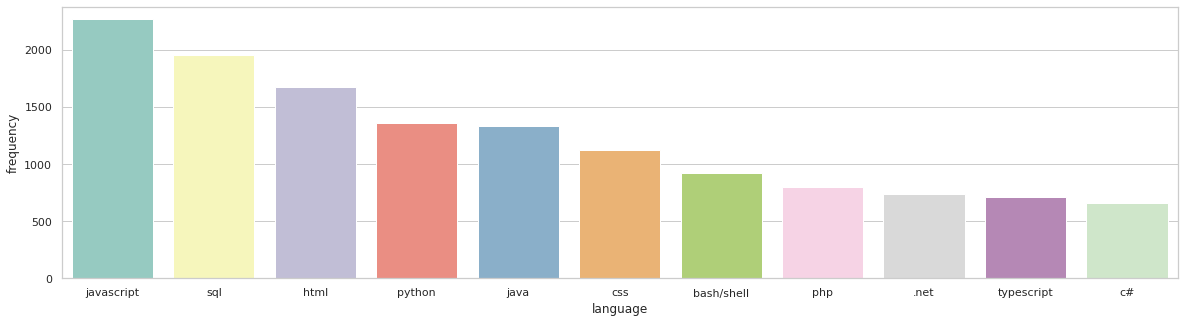

In [15]:
seaborn.set_theme(style="whitegrid")
fig = plt.figure(figsize=(20,5))
seaborn.barplot(x="language", y="frequency", palette='Set3', data=language_count_cut_off, order=language_count_cut_off['language'])


### 3. Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. 

Para realizar este procedimiento se proponen los siguientes pasos:

### Listado de Lenguajes con los que se analizará la información:


#### 3 a) Definir los Lenguajes populares:

In [16]:
filter_list=list(language_count_cut_off.language)
print(f'Listado de los lenguajes populares:\n {filter_list}')

Listado de los lenguajes populares:
 ['javascript', 'sql', 'html', 'python', 'java', 'css', 'bash/shell', 'php', '.net', 'typescript', 'c#']


#### 3 b)Extraer las muestras que tienen los lenguajes filtrados:


In [17]:
# Filter out languages that we want to exclude
# Complete here with your selected list. 
filtered_df_lang = df_lang[df_lang.programming_language.isin(filter_list)]


In [18]:
filtered_df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,profile_gender,profile_has_disabilities,profile_years_experience,work_years_in_company,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...,...,...,...,...,...
6090,css,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."


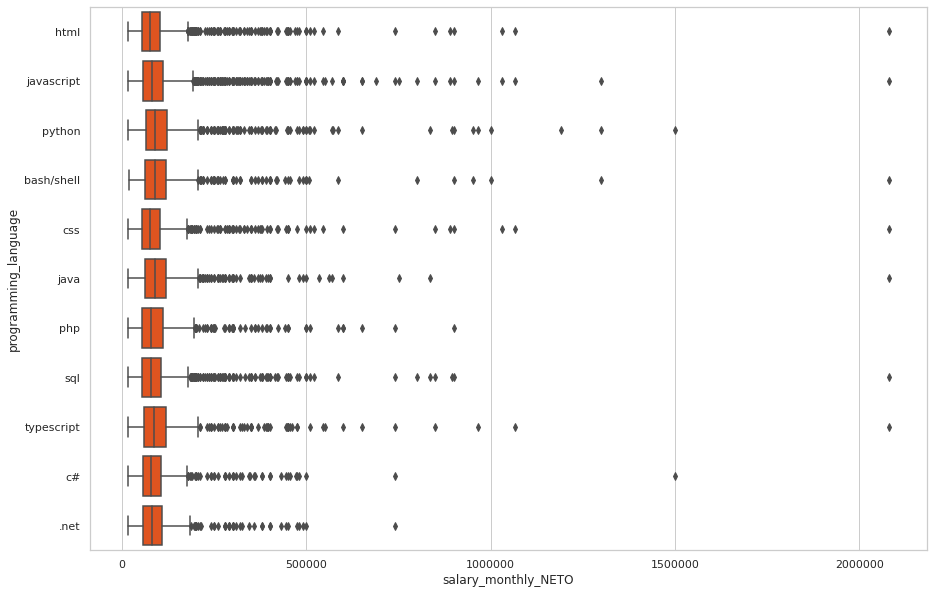

In [19]:
seaborn.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
seaborn.boxplot(data=filtered_df_lang, x='salary_monthly_NETO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

Sin embargo a pesar de los filtros mencionados en pasos anteriores la información se encuentra ruidosa, es por esto que descartaremos por lenguaje aquellos valores que se encuentren por encima del percentil 90. Se construyó entonces una función en Python que realizara esta tarea:

In [20]:
def exclude_outliers(df, languages, column='salary_monthly_NETO', k=90):
  """
  filtrando el conjunto de datos según el percentil K, a partir de un listado de 
  lenguajes de programación y el salario mensual neto. El valor K, puede ser modificado...
  Se recomienda utilizar una vez se hayan realizado filtros en la base de datos
  """
  
  df2 = df.copy()

  for lang in languages:
    percentile_k = df2.loc[df2['programming_language']==lang, column].quantile(k / 100)
    filter_k_above = (df2['programming_language']==lang) & (df2[column]>percentile_k)
    print(f'Percentil {k} de la columna {column} para el lenguaje: {lang}')
    print(f'Elementos totales: {len(df2)}')
    print(f'Elementos filtrados: {filter_k_above.sum()}')
    df2 = df2[~filter_k_above]
    print(f'Elementos restantes {len(df2)}')
    
  return df2 

# Excluyendo aquellos valores que se encuentren por encima del 90% de la muestra por lenguaje.... 
df_without_outliers = exclude_outliers(filtered_df_lang, filter_list, 'salary_monthly_NETO', 90)


#imprimiendo en pantalla el registro de elementos descartados y valores resultantes
print(len(df_without_outliers))



Percentil 90 de la columna salary_monthly_NETO para el lenguaje: javascript
Elementos totales: 13527
Elementos filtrados: 226
Elementos restantes 13301
Percentil 90 de la columna salary_monthly_NETO para el lenguaje: sql
Elementos totales: 13301
Elementos filtrados: 192
Elementos restantes 13109
Percentil 90 de la columna salary_monthly_NETO para el lenguaje: html
Elementos totales: 13109
Elementos filtrados: 166
Elementos restantes 12943
Percentil 90 de la columna salary_monthly_NETO para el lenguaje: python
Elementos totales: 12943
Elementos filtrados: 136
Elementos restantes 12807
Percentil 90 de la columna salary_monthly_NETO para el lenguaje: java
Elementos totales: 12807
Elementos filtrados: 120
Elementos restantes 12687
Percentil 90 de la columna salary_monthly_NETO para el lenguaje: css
Elementos totales: 12687
Elementos filtrados: 111
Elementos restantes 12576
Percentil 90 de la columna salary_monthly_NETO para el lenguaje: bash/shell
Elementos totales: 12576
Elementos filtrad

In [21]:
# Conjunto de datos Final:
df_without_outliers 

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,profile_gender,profile_has_disabilities,profile_years_experience,work_years_in_company,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...,...,...,...,...,...
6090,css,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ..."


# Boxenplot del conjunto de datos:

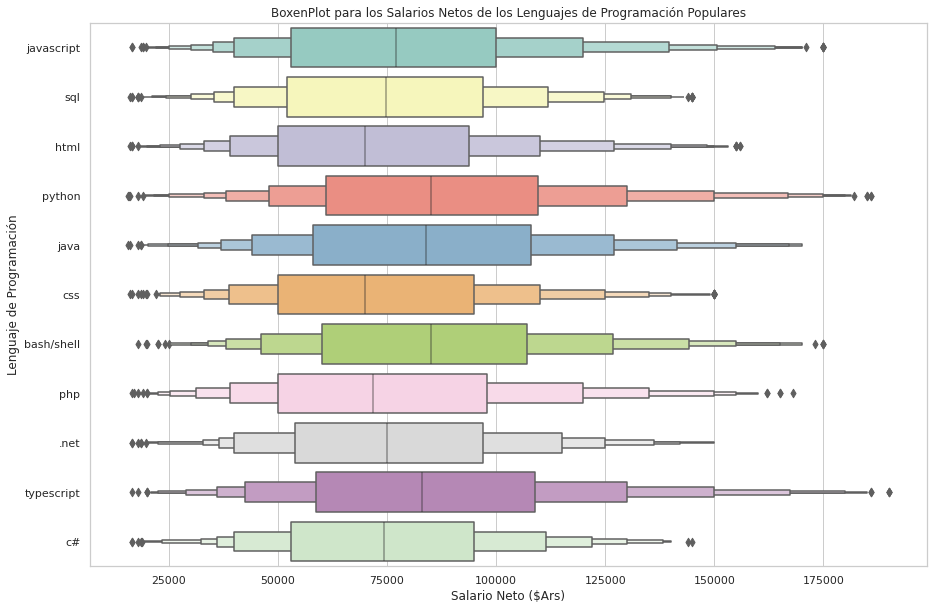

In [22]:
seaborn.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
seaborn.boxenplot(data=df_without_outliers, x='salary_monthly_NETO', y='programming_language',
                palette='Set3', order=filter_list).set(title='BoxenPlot para los Salarios Netos de los Lenguajes de Programación Populares',
                                                       xlabel='Salario Neto ($Ars)', ylabel='Lenguaje de Programación')
     
plt.ticklabel_format(style='plain', axis='x')

Con el propósito de hacer mas claras las cantidades agrupamos en formato de tabla los valores:

In [23]:
#Relacionamos el Salario Neto agrupado por lenguaje de programación

df_salary_and_program_len = df_without_outliers[["salary_monthly_NETO","programming_language"]]
df_prom = df_salary_and_program_len.groupby("programming_language", as_index=False).mean().rename(columns={"salary_monthly_NETO": "Mean_Salary"})
df_median = df_salary_and_program_len.groupby("programming_language", as_index=False).median().rename(columns={"salary_monthly_NETO": "Median_Salary"})
df_min = df_salary_and_program_len.groupby("programming_language", as_index=False).min().rename(columns={"salary_monthly_NETO": "Min_Salary"})
df_max = df_salary_and_program_len.groupby("programming_language", as_index=False).max().rename(columns={"salary_monthly_NETO": "Max_Salary"})
df_count = df_salary_and_program_len.groupby("programming_language", as_index=False).count().rename(columns={"salary_monthly_NETO": "Users_x_language"})


In [24]:
from functools import reduce
dfs = [df_prom,df_median,df_min,df_max,df_count]
df_final = reduce(lambda left,right: pd.merge(left,right,on='programming_language'), dfs)
df_final


,programming_language,Mean_Salary,Median_Salary,Min_Salary,Max_Salary,Users_x_language
0,.net,76729.118909,75000.0,16600.0,150000.0,669
1,bash/shell,86597.585097,85000.0,17900.0,175000.0,828
2,c#,75079.776420,74230.0,16600.0,145000.0,595
3,css,73311.811816,70000.0,16000.0,150000.0,1013
4,html,73817.123967,70000.0,16000.0,156000.0,1505
5,java,85717.180363,84000.0,15600.0,170000.0,1213
6,javascript,79400.552360,77000.0,16475.0,175000.0,2038
7,php,76071.418106,71700.0,16475.0,168000.0,718
8,python,87824.583358,85000.0,15600.0,186000.0,1218
9,sql,75771.477416,74750.0,16000.0,145000.0,1765


## Conclusiones:

  *  En general del conjunto de programación filtrado como lenguajes de programación popular (es decir con más de 500 usuarios) y que se encontrara dentro del percentil 90, se puede resaltar que no hay un solo lenguaje que se presente de manera significativa como el mejor pagado para la muestra estudiada y los filtros aplicados. 
  *  CSS y HTML presentan valores similares en cuanto a su distribución salarial. Además estos cuentan con los promedios salariales más bajos del conjunto.
  *  Por su parte Python y Bash/Shell, son los lenguajes que  presentan los promedios salariales más altos dentro de los 10 lenguajes populares. A su vez se puede notar que sus valores de mediana son iguales. 

## Ejercicio 2 - Densidades y varias variables:

Responder a la pregunta general: **_¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?_**

Para ello considere (igual al ejercicio anterior):

1. Seleccionar las columnas relevantes para analizar. 
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

Variables a analizar:
  *  Numéricas: 
   salary_monthly_NETO, work_years_in_company, profile_years_experience.
  *  Categóricas: profile_gender, work_contract_type, profile_has_disabilities






### a) Densidad conjunta 
Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa



# 2. Respuesta:
En este punto seguimos con el conjunto de datos filtrado en el punto 1. Luego nos planteamos si los años trabajados para un programador que ha respondido que presenta una discapacidad (específicamente abordamos Auditiva / Visual) y se desempeña en una compañia con un contrato _Full-time_, presenta mejoras en su salario en la medida que aumentan los años de servicio.



In [25]:
# Creamos el conjunto de datos para quienes presenten estas condiciones en el conjunto de datos:
df_has_dis = df_without_outliers.copy()

# Filtro de condicion
f_condicion =  (df_has_dis['profile_has_disabilities']=='Visual') | (df_has_dis['profile_has_disabilities']=='Auditiva') & (df_has_dis['work_contract_type']== 'Full-Time') 
df_has_disa = df_has_dis[f_condicion]

# imprimiendo en pantalla los resultados
df_has_disa



,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,profile_gender,profile_has_disabilities,profile_years_experience,work_years_in_company,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]"
52,bash/shell,Bash/Shell,74144.0,95125.0,Full-Time,Hombre,Visual,10.0,3.0,Terciario,[bash/shell]
55,bash/shell,"Bash/Shell, Python",80000.0,105000.0,Full-Time,Hombre,Visual,6.0,9.0,Universitario,"[bash/shell, python]"
...,...,...,...,...,...,...,...,...,...,...,...
5976,python,"Bash/Shell, Python",80000.0,100000.0,Full-Time,Mujer,Auditiva,8.0,1.0,Universitario,"[bash/shell, python]"
5978,javascript,"Javascript, Kotlin, Swift",45000.0,56000.0,Full-Time,Hombre,Auditiva,5.0,2.0,Universitario,"[javascript, kotlin, swift]"
6063,bash/shell,"Bash/Shell, CSS, HTML, Javascript, TypeScript",157000.0,200000.0,Full-Time,Hombre,Visual,10.0,2.0,Universitario,"[bash/shell, css, html, javascript, typescript]"
6063,javascript,"Bash/Shell, CSS, HTML, Javascript, TypeScript",157000.0,200000.0,Full-Time,Hombre,Visual,10.0,2.0,Universitario,"[bash/shell, css, html, javascript, typescript]"


Dado que los registros se encuentran duplicados, pues representan los posibles lenguajes de programación que el encuestado maneja. Eliminaremos los mismos usando la columna indice.

In [26]:
# Sin Discapacidad - sin registros duplicados
df4 = df_has_disa.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
# df_has_disa.reset_index(drop=True)

A si mismo nos interesa analizar el complemento de la información estudiada:

In [27]:
df_comple_dis = df_has_dis[~f_condicion]
fil_contra = df_comple_dis['work_contract_type']== 'Full-Time'
df_comple_dis2 = df_comple_dis[fil_contra]
df6 = df_comple_dis2.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')

# Gráficos para conjunto de datos con Discapacidades:

Text(0.5, 1.05, 'Salarios de usuarios con discapacidad visual/auditiva \n vs Años de servicio en compañia')

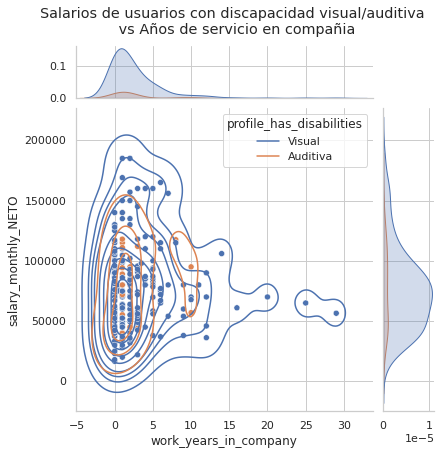

In [58]:
# Joint plot para el conjunto usuarios que programan en lenguajes populares y presentan una discapacidad visual/auditiva
seaborn.jointplot(x = df4.work_years_in_company, y = df4.salary_monthly_NETO, 
                  hue=df4.profile_has_disabilities,marginal_ticks=True, ).plot_joint(seaborn.kdeplot)
plt.suptitle('Salarios de usuarios con discapacidad visual/auditiva \n vs Años de servicio en compañia', y = 1.05)


# Gráficos para conjunto de datos información complementaria con contrato _Full Time_:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


Text(0.5, 1.05, 'Salarios de usuarios en general \n vs Años de servicio en compañia')

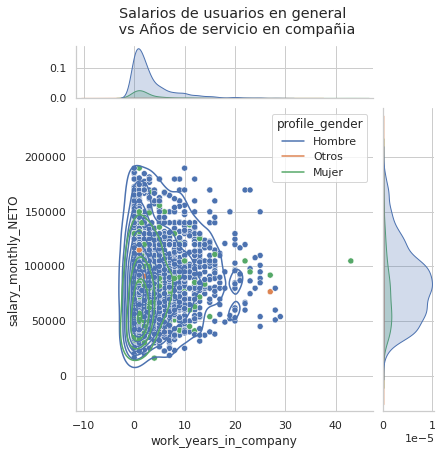

In [59]:
# Joint plot para el complemento del conjunto estudiado lenguajes populares
seaborn.jointplot(x = df6.work_years_in_company, y = df6.salary_monthly_NETO, 
                  hue=df6.profile_gender,marginal_ticks=True).plot_joint(seaborn.kdeplot)
plt.suptitle('Salarios de usuarios en general \n vs Años de servicio en compañia', y = 1.05)

* De los anteriores gráficos se puede concluir que no se observa una tendencia en ninguno de los dos conjuntos de datos (con discapacidad visual/auditiva), entre la variable  años de trabajo en la empresa y el sueldo Neto. 
* A su vez se puede destacar que la condición de tener una discapacidad no es una medida discriminatora dentro de la muestra evaluada.


### b) Asociación 
Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple. ¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría: 


Text(0.5, 1.05, 'Distribucción de la tasa: salary_NETO/BRUTO usuarios programadores de lenguajes populares')

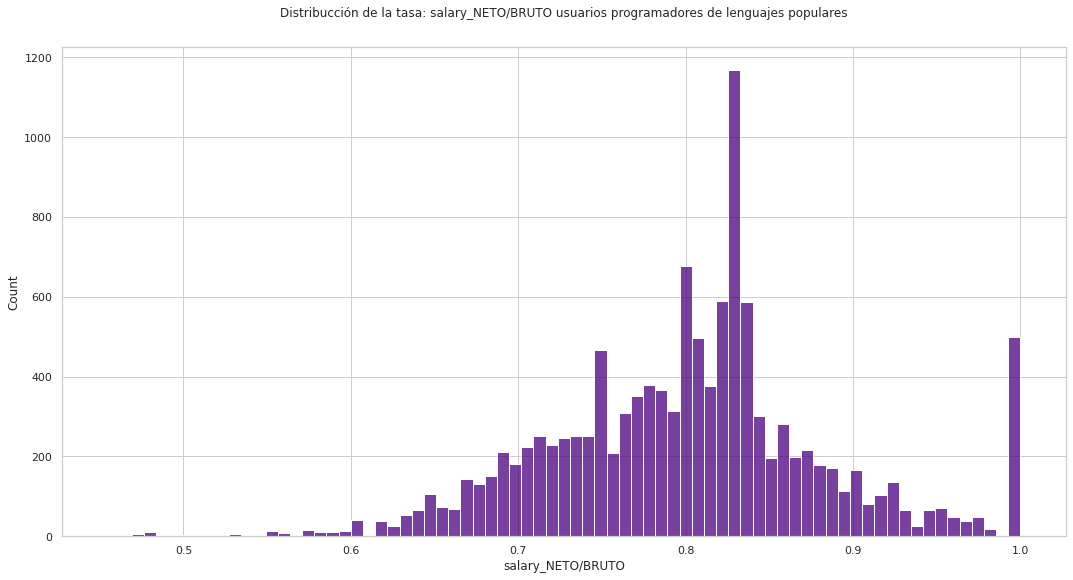

In [64]:
# Creamos un tasa entre el Neto y el salario Bruto:
df_without_outliers['salary_NETO/BRUTO'] = df_without_outliers['salary_monthly_NETO']/df_without_outliers['salary_monthly_BRUTO']

# Acotamos a la region de interes:
df_acotado = df_without_outliers[(df_without_outliers['salary_NETO/BRUTO']>0.45) & (df_without_outliers['salary_NETO/BRUTO']<1.3)]
fig = plt.figure(figsize=(18, 9))

# Visualizamos la distribucion de la tasa -salary_NETO/BRUTO-:
seaborn.histplot(df_acotado['salary_NETO/BRUTO'], bins=75, color = 'indigo')
plt.title('Distribucción de la tasa: salary_NETO/BRUTO usuarios programadores de lenguajes populares', loc='center',  y = 1.05)


Al realizar la tasa entre el salario NETO y BRUTO, se puede notar que la mayo parte de los valores se encuentran concentrados entre: 0.6 y 1, aunque también existen valores de cociente muy próximos a cero. Esto podría deberse a los filtros aplicados previamente. Por ejemplo en el que se considero eliminar aquellos valores en los que el salario Neto fuese superior al salario Bruto.

Por otra parte consideramos la correlación entre ambas variables:

In [31]:
correla_var = df_without_outliers[['salary_monthly_BRUTO', 'salary_monthly_NETO']].corr()
print(correla_var)

                      salary_monthly_BRUTO  salary_monthly_NETO
salary_monthly_BRUTO              1.000000             0.755835
salary_monthly_NETO               0.755835             1.000000


Text(0.5, 1.05, 'Correlación entre las variables salary_NETO y salary_BRUTO \nusuarios programadores de lenguajes populares')

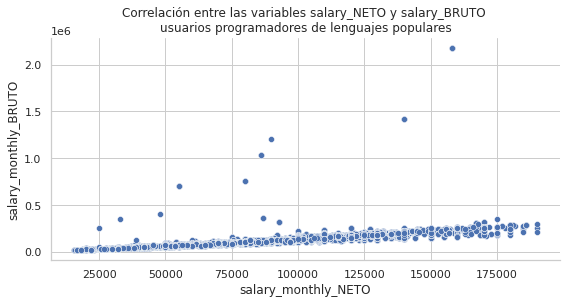

In [66]:
seaborn.pairplot(data=df_without_outliers, y_vars=['salary_monthly_BRUTO'], x_vars=['salary_monthly_NETO'],  aspect=2, height=4)
plt.title('Correlación entre las variables salary_NETO y salary_BRUTO \nusuarios programadores de lenguajes populares', loc='center',  y = 1.05)

De la anterior podemos inferir que ambas variables se encuentran fuertemente relacionadas y que existe una tendencia lineal y positiva entre ellas. A su vez se detecta que apesar de los filtros aun se presentan algunos outliers entre estas variables analizadas. Finalmente la correlación entre ellas es cercana a 0.76.


### c) Densidad condicional 
Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable 'salary_monthly_NETO' ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación



In [33]:
df_universita = df_without_outliers[df_without_outliers.profile_studies_level.isin(['Universitario','Posdoctorado', 'Posgrado', 'Doctorado'])]
df_no_univer = df_without_outliers[df_without_outliers.profile_studies_level.isin(['Terciario', 'Primario', 'Secundario'])]

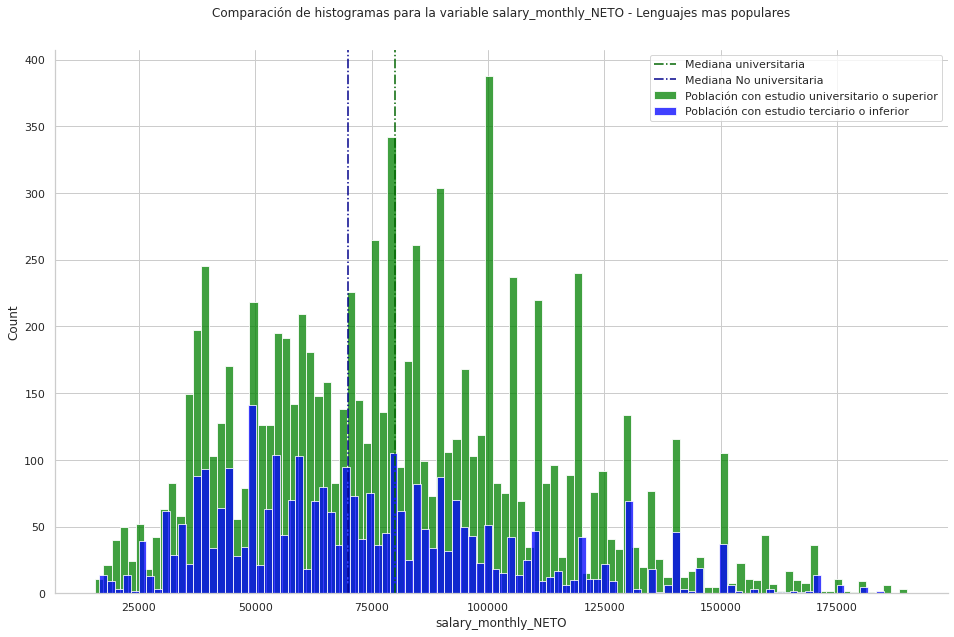

In [67]:
fig, axes = plt.subplots(nrows=1, figsize=(16, 10))

seaborn.histplot(df_universita.salary_monthly_NETO, bins = 100, color = 'green', label = 'Población con estudio universitario o superior')
plt.axvline(df_universita['salary_monthly_NETO'].median(), color='darkgreen',linestyle='-.', label='Mediana universitaria')
seaborn.histplot(df_no_univer.salary_monthly_NETO, color = 'blue', bins = 100, label = 'Población con estudio terciario o inferior')
plt.axvline(df_no_univer['salary_monthly_NETO'].median(), color='darkblue',linestyle='-.', label='Mediana No universitaria')

plt.legend()
seaborn.despine()
plt.title("Comparación de histogramas para la variable salary_monthly_NETO - Lenguajes mas populares",  y = 1.05)
plt.show()

In [35]:
print(f'Estadísticas Descriptivas para el grupo con educación universitaria o superior: \n {df_universita.salary_monthly_NETO.describe().round()} \n')
print('--- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- ')
print(f'Estadísticas Descriptivas para el grupo con educación terciaria o inferior: \n {df_no_univer.salary_monthly_NETO.describe().round()} \n' )


Estadísticas Descriptivas para el grupo con educación universitaria o superior: 
 count      9052.0
mean      81205.0
std       32795.0
min       15600.0
25%       55870.0
50%       80000.0
75%      102000.0
max      190000.0
Name: salary_monthly_NETO, dtype: float64 

--- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- 
Estadísticas Descriptivas para el grupo con educación terciaria o inferior: 
 count      3147.0
mean      74302.0
std       31810.0
min       16475.0
25%       50000.0
50%       70000.0
75%       92650.0
max      185000.0
Name: salary_monthly_NETO, dtype: float64 



In [36]:
print(f'Moda en cuanto a genero con educación universitaria o superior: \n {df_universita.profile_gender.mode()}')
print('--- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- ')
print(f'Moda en cuanto a genero con educacióncon educación terciaria o inferior: \n {df_no_univer.profile_gender.mode()}')

Moda en cuanto a genero con educación universitaria o superior: 
 0    Hombre
dtype: object
--- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- --- ---- ---- 
Moda en cuanto a genero con educacióncon educación terciaria o inferior: 
 0    Hombre
dtype: object


### d) Densidad Conjunta condicional 
Elija dos variables numéricas y una categórica. Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


In [85]:
#print(df_without_outliers.profile_years_experience.loc[])
df_e = df_without_outliers["profile_years_experience"]<25

In [86]:
df_without_outliers[df_e]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,profile_gender,profile_has_disabilities,profile_years_experience,work_years_in_company,profile_studies_level,cured_programming_languages,salary_NETO/BRUTO
1,html,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]",0.797468
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]",0.797468
1,python,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,Hombre,Visual,5.0,2.0,Universitario,"[html, javascript, python]",0.797468
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,Hombre,NaN,15.0,15.0,Posgrado,"[bash/shell, c, css, html, java, javascript, p...",0.784615
...,...,...,...,...,...,...,...,...,...,...,...,...
6090,css,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ...",0.979798
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ...",0.979798
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ...",0.979798
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,Full-Time,Hombre,NaN,13.0,6.0,Terciario,"[.net, c#, cobol, css, html, javascript, php, ...",0.979798
